In [52]:
import cv2, torch
import numpy as np
from torch.nn import functional as F

from models import DeepLabV3Plus
from dataloaders import transforms
from utils import utils

from matplotlib import pyplot as plt

In [119]:
!pwd

/nmnt/media/home/alex_samoylenko/PeopleSegmentation/Human-Segmentation-PyTorch


In [53]:
model = DeepLabV3Plus(
    backbone="resnet18",
    num_classes=2,
    pretrained_backbone=None
)

if torch.cuda.is_available():
    model = model.cuda()

#load weights
weightsPath = '/nmnt/media/home/alex_samoylenko/PeopleSegmentation/Human-Segmentation-PyTorch/DeepLabV3Plus_ResNet18.pth'
trained_dict = torch.load(weightsPath, map_location="cpu")['state_dict']

model.load_state_dict(trained_dict, strict=False)
model.eval()

[ResNet] Initialize weights...


DeepLabV3Plus(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [137]:
image = cv2.imread('/nmnt/media/home/alex_samoylenko/PeopleSegmentation/8l8U6c9_uQQ.jpg')
h, w = image.shape[0:2]

In [151]:
image = np.stack([image[..., 2], image[..., 1], image[..., 0]],  axis=-1)

In [152]:
X, pad_up, pad_left, h_new, w_new = utils.preprocessing(image, expected_size=320, pad_value=0)

In [153]:
with torch.no_grad():
	if torch.cuda.is_available():
		mask = model(X.cuda())
		mask = mask[..., pad_up: pad_up+h_new, pad_left: pad_left+w_new]
		mask = F.interpolate(mask, size=(h,w), mode='bilinear', align_corners=True)
		mask = F.softmax(mask, dim=1)
		mask = mask[0,1,...].cpu().numpy()
	else:
		mask = model(X)
		mask = mask[..., pad_up: pad_up+h_new, pad_left: pad_left+w_new]
		mask = F.interpolate(mask, size=(h,w), mode='bilinear', align_corners=True)
		mask = F.softmax(mask, dim=1)
		mask = mask[0,1,...].numpy()

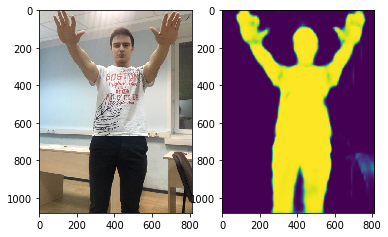

In [154]:
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(mask)

In [155]:
mask1 = (mask > 0.3).astype(int)

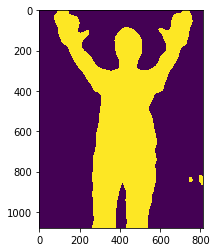

In [156]:
plt.imshow(mask1)

In [ ]:
from gd